# Trip

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

In [8]:
def evaluate(y_true, y_pred_proba, debug=False):
    max_threshold = -1
    max_f1 = 0
    max_recall = 0
    max_precision = 0
    mac_acc = 0

#     for THRESHOLD in range(50, 51):
    for THRESHOLD in range(0, 100):
        THRESHOLD = THRESHOLD/100
        y_pred_thr = [1 if x>=THRESHOLD else 0 for x in y_pred_proba]
        f1 = f1_score(y_true, y_pred_thr, average='macro')
        recall = recall_score(y_true, y_pred_thr)
        precision = precision_score(y_true, y_pred_thr)
        acc = accuracy_score(y_true, y_pred_thr)
        
        if debug:
            print("THRESHOLD: {:.3f} \tF1: {:.8f} \tRecall: {:.8f} \tPrecision: {:.8f}".format(THRESHOLD, 
                                                                                               f1, 
                                                                                               recall, 
                                                                                               precision))

        if f1>max_f1:
            max_f1 = f1
            max_recall = recall
            max_precision = precision
            mac_acc = acc
            max_threshold = THRESHOLD
            
    print("##MAX## \nTHRESHOLD: {:.3f} \tF1: {:.8f} \tRecall: {:.8f} \tPrec: {:.8f} \tAcc: {:.8f}".format(max_threshold,
                                                                                                         max_f1, 
                                                                                                         max_recall, 
                                                                                                         max_precision,
                                                                                                         mac_acc))
    return max_f1, max_recall, max_precision, mac_acc

In [9]:
TOTAL_DATA = 9816
type_list = ['A', 'B', 'C']
type_C_mult = [0.5, 1, 1.5, 2, 3]
result_list = []

for EXPERIMENT_TYPE in type_list:
    for mult in type_C_mult:
        print("Result: type {} mult {}".format(EXPERIMENT_TYPE, mult))
        data = pd.read_csv('result_trip_advisor_yelp_XLM_R_{}_{}_{}_full.csv'.format(EXPERIMENT_TYPE, TOTAL_DATA, mult))
        max_f1, max_recall, max_precision, max_acc = evaluate(data.y_true.values, data.y_pred.values, debug=False)
        
        if EXPERIMENT_TYPE == 'A':
            mult = 0
        if EXPERIMENT_TYPE == 'B':
            mult = -1
            
            
        result_list.append({
            'tipe': EXPERIMENT_TYPE,
            'total_data': TOTAL_DATA, 
            'foreign_mult': mult,
            'total_foreign_data':int(TOTAL_DATA*mult) if EXPERIMENT_TYPE=='C' else 0,
            'max_f1': max_f1,
            'max_recall': max_recall,
            'max_precision': max_precision,
            'max_accuracy': max_acc
        })
        
        if EXPERIMENT_TYPE != 'C':
            break

Result: type A mult 0.5
##MAX## 
THRESHOLD: 0.010 	F1: 0.79530945 	Recall: 0.80622222 	Prec: 0.76540084 	Acc: 0.79580074
Result: type B mult 0.5
##MAX## 
THRESHOLD: 0.660 	F1: 0.89065126 	Recall: 0.87822222 	Prec: 0.88609865 	Acc: 0.89131330
Result: type C mult 0.5
##MAX## 
THRESHOLD: 0.130 	F1: 0.82266581 	Recall: 0.84355556 	Prec: 0.78886118 	Acc: 0.82297242
Result: type C mult 1
##MAX## 
THRESHOLD: 0.030 	F1: 0.83809938 	Recall: 0.82400000 	Prec: 0.82767857 	Acc: 0.83902841
Result: type C mult 1.5
##MAX## 
THRESHOLD: 0.010 	F1: 0.75576478 	Recall: 0.63466667 	Prec: 0.81321185 	Acc: 0.76327707
Result: type C mult 2
##MAX## 
THRESHOLD: 0.170 	F1: 0.89680297 	Recall: 0.88088889 	Prec: 0.89602170 	Acc: 0.89748868
Result: type C mult 3
##MAX## 
THRESHOLD: 0.140 	F1: 0.84495948 	Recall: 0.84266667 	Prec: 0.82722513 	Acc: 0.84561548


In [10]:
final_result = pd.DataFrame(result_list) 
final_result.to_csv('final_{}_{}_{}_result_combined_{}.csv'.format('trip_advisor',
                                                                   'yelp',
                                                                   'xlm_r',
                                                                   TOTAL_DATA),
                    index=False)
    
print(final_result.shape)
final_result.head()

(7, 8)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision,max_accuracy
0,A,9816,0.0,0,0.795309,0.806222,0.765401,0.795801
1,B,9816,-1.0,0,0.890651,0.878222,0.886099,0.891313
2,C,9816,0.5,4908,0.822666,0.843556,0.788861,0.822972
3,C,9816,1.0,9816,0.838099,0.824000,0.827679,0.839028
4,C,9816,1.5,14724,0.755765,0.634667,0.813212,0.763277


In [8]:
data = pd.read_csv('final_trip_advisor_yelp_xlm_r_result_combined_9816.csv')
data = data.sort_values(by=['foreign_mult'])
data.head()

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision,max_accuracy
1,B,9816,-1.0,0,0.890651,0.878222,0.886099,0.891313
0,A,9816,0.0,0,0.795309,0.806222,0.765401,0.795801
2,C,9816,0.5,4908,0.822666,0.843556,0.788861,0.822972
3,C,9816,1.0,9816,0.838099,0.824000,0.827679,0.839028
4,C,9816,1.5,14724,0.755765,0.634667,0.813212,0.763277


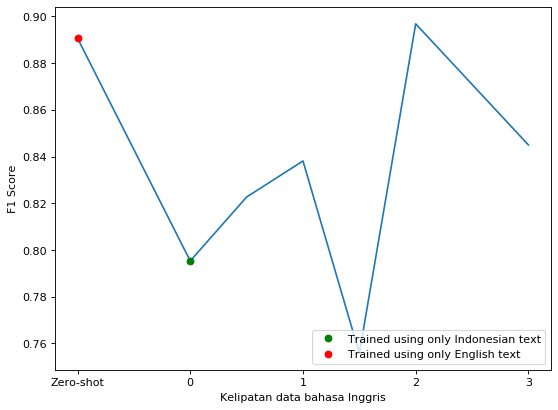

In [10]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.plot(data[(data['total_data'] == 9816 )].foreign_mult.values, data[(data['total_data'] == 9816)].max_f1.values)
    
plt.plot(data[(data['tipe'] == 'A' )].foreign_mult.values,
data[(data['tipe'] == 'A')].max_f1.values,
'go',
label='Trained using only Indonesian text')

plt.plot(data[(data['tipe'] == 'B' )].foreign_mult.values,
data[(data['tipe'] == 'B')].max_f1.values,
'ro',
label='Trained using only English text')

xticks([-1, 0, 1, 2, 3], ['Zero-shot', 0, 1, 2, 3])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data bahasa Inggris')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()